In [ ]:
# function list collector

# def document_class(cls):
#   print(f"Class: {cls.__name__}")

#   for name, func in inspect.getmembers(cls, inspect.isfunction):
#     print(f"- {name}()")

# # Example
# document_class(KittiDataset)


In [1]:
import os
import random
from matplotlib import pyplot as plt

from data.kitti_dataset import KittiDataset
#from data.crop_aug import save_cropped_boxes,load_cropped_boxes,vis_cropped_boxes

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# <center> KITTIDATASET CLASS </center>

The following displays how the dataset is initialized and datapoints are visualized

In [2]:
kitti = KittiDataset() # initialize data object

Loaded 2305 Pedestrian
Loaded 5970 Car
Loaded 654 Cyclist


In [ ]:
print(kitti) # summary of dataset

6447
#(points)=(17002, 3)


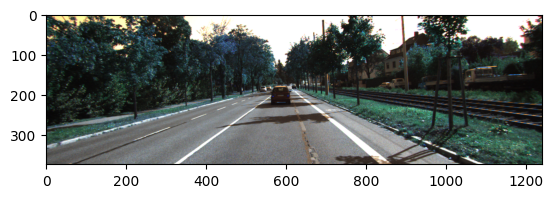

In [7]:
# visualisation/ transformations check
idx = random.choice(range(kitti.num_files))

while not any([_['name'] =='Truck' for _ in kitti.get_label(idx)]):
  idx = random.choice(range(kitti.num_files))
  
print(idx)
plt.imshow(kitti.get_image(idx))
kitti.inspect_points(frame_idx=idx,downsample_voxel_size=0.05)


In [17]:
kitti.get_label(idx)[2]

{'name': 'DontCare',
 'truncation': -1.0,
 'occlusion': -1,
 'alpha': -10.0,
 'xmin': 0.0,
 'ymin': 267.73,
 'xmax': 102.12,
 'ymax': 373.0,
 'height': -1.0,
 'width': -1.0,
 'length': -1.0,
 'x3d': -1000.0,
 'y3d': -1000.0,
 'z3d': -1000.0,
 'yaw': -10.0}

In [ ]:
# creates and load json file conatining cropped boxes
CROPPED_FILE = 'data/cropped/test.json'
# kitti.save_cropped_boxes(
#   filename=CROPPED_FILE,
#   minimum_points=10,
#   backlist=['Van', 'Truck', 'Misc', 'Tram', 'Person_sitting']
# )

In [ ]:
# read json file contianing cropped boxes
cropped_labels,cropped_cam_points = kitti.load_cropped_boxes(CROPPED_FILE)

In [ ]:
# visualizes isolated objects
kitti.vis_cropped_boxes(cropped_labels,cropped_cam_points,object_class='Van')

In [ ]:
kitti.vis_crop_aug_sampler()